In [584]:
import pandas as pd
import numpy as np
import datetime as dt

In [585]:
SELECTED_STATE_FIPS = 6
NORMALIZATION_FACTOR = 100000
NORMALIZATION_FLAG = False
MARKER_SIZE=5

In [586]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

class MyRegressionModel:
    """
    df: should be in format <index = Datetime> <columns = state_name> <values = number of new cases/deaths>
    """
    def __init__(self, x_train, y_train, x_test, y_test, fit_type='Linear', error_type='RMSE', degree=3):
        self.degree = degree
        self.fit_type = fit_type
        self.error_type = error_type
        self.degree = degree
        self.fit_data(x_train, y_train)
        self.test_model(x_test, y_test)
    
    def fit_data(self, x_train, y_train):
        pr = LinearRegression()
        x = x_train.reshape(-1,1)
        y = y_train
        if self.fit_type == 'Polynomial':
            poly = PolynomialFeatures(degree=self.degree)
            x = poly.fit_transform(x)
        pr.fit(x, y)
        self.model = pr  
    
    def test_model(self, x_test, y_test):
        if self.fit_type == 'Polynomial':
            poly = PolynomialFeatures(degree=self.degree)
            x_test = poly.fit_transform(x_test)
        y_pred = self.model.predict(x_test)
        if self.error_type == 'RMSE':
            self.error = sqrt(abs(mean_squared_error(y_test, y_pred)))
            
            
    def predict(self, x):
        if self.fit_type == 'Polynomial':
            poly = PolynomialFeatures(degree=self.degree)
            x = poly.fit_transform(x)
        return self.model.predict(x)
        
        
        

def get_county_population(county_name):
    df = pd.read_csv('data/covid_county_population_usafacts.csv')
    df = df[df['County Name'] == county_name]
    return df['population'].values[0]

In [587]:
covid_confirmed_df = pd.read_csv('data/covid_confirmed_usafacts.csv')
covid_confirmed_df = covid_confirmed_df[covid_confirmed_df['countyFIPS'] != 0]
covid_confirmed_df = covid_confirmed_df[covid_confirmed_df['StateFIPS'] == SELECTED_STATE_FIPS]

In [588]:
covid_deaths_df = pd.read_csv('data/covid_deaths_usafacts.csv')
covid_deaths_df = covid_deaths_df[covid_deaths_df['countyFIPS'] != 0]
covid_deaths_df = covid_deaths_df[covid_deaths_df['StateFIPS'] == SELECTED_STATE_FIPS]

In [589]:
selected_state_name = covid_confirmed_df['State'].iloc[0]
covid_confirmed_df = covid_confirmed_df.drop(['State', 'StateFIPS'], axis=1)
covid_deaths_df = covid_deaths_df.drop(['State', 'StateFIPS'], axis=1)

In [590]:
covid_confirmed_df.head(3)

,countyFIPS,County Name,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
191,6001,Alameda County,4,4,4,5,5,5,5,5,...,369865,369865,371477,371682,371847,371955,372102,372232,372305,372364
192,6003,Alpine County,0,0,0,0,0,0,0,0,...,138,138,139,139,139,139,139,139,139,139
193,6005,Amador County,1,1,1,1,1,1,1,1,...,10339,10339,10381,10386,10391,10392,10395,10396,10398,10399


In [591]:
covid_deaths_df.head(3)

,countyFIPS,County Name,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
191,6001,Alameda County,0,0,0,0,0,0,0,0,...,2098,2098,2125,2125,2125,2125,2125,2125,2125,2125
192,6003,Alpine County,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,6005,Amador County,0,0,0,0,0,0,0,0,...,96,96,97,97,97,97,97,97,97,97


In [592]:
covid_county_most_cases = covid_confirmed_df.sort_values(by=str(covid_confirmed_df.columns[-1]), ascending=False)
covid_county_most_cases = covid_county_most_cases.iloc[:5]
selected_counties_most_cases_fips = covid_county_most_cases['countyFIPS'].values
selected_counties_most_cases_names = covid_county_most_cases['County Name'].values
covid_county_most_cases = covid_county_most_cases.drop(['countyFIPS', 'County Name'], axis=1)
covid_county_most_cases

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
209,375,379,382,384,385,388,390,391,392,401,...,3433929,3433929,3445989,3447247,3448295,3449312,3450050,3450670,3451023,3451236
227,0,0,0,0,0,0,0,0,0,0,...,967383,967383,970803,971338,971759,972124,972429,972689,972860,973029
223,60,60,60,60,60,61,61,61,61,62,...,723518,723518,726237,726482,726693,726875,727071,727241,727327,727396
226,76,78,78,80,81,83,84,85,86,89,...,699474,699474,701753,701972,702129,702309,702439,702549,702633,702697
220,8,8,9,9,9,9,9,9,10,10,...,697388,697388,700011,700318,700576,700810,701049,701257,701371,701471


In [593]:
covid_county_most_deaths = covid_deaths_df.sort_values(by=str(covid_deaths_df.columns[-1]), ascending=False)
covid_county_most_deaths = covid_county_most_deaths.iloc[:5]
selected_counties_most_deaths_fips = covid_county_most_deaths['countyFIPS']
selected_counties_most_deaths_names = covid_county_most_deaths['County Name']
covid_county_most_deaths = covid_county_most_deaths.drop(['countyFIPS', 'County Name'], axis=1)
covid_county_most_deaths

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
209,0,0,0,0,0,0,0,0,0,0,...,34488,34488,34762,34771,34779,34783,34786,34786,34786,34786
226,0,0,0,0,0,0,0,0,0,0,...,8104,8104,8115,8116,8116,8116,8116,8116,8116,8116
220,0,0,0,0,0,0,0,0,0,0,...,7683,7683,7754,7754,7754,7754,7754,7754,7754,7754
223,0,0,0,0,0,0,0,0,0,0,...,6714,6714,6753,6753,6753,6753,6753,6753,6753,6753
227,0,0,0,0,0,0,0,0,0,0,...,5662,5662,5697,5698,5702,5702,5702,5703,5703,5703


In [594]:
covid_county_most_cases.columns = pd.to_datetime(covid_county_most_cases.columns)
covid_county_most_cases.index = selected_counties_most_cases_names
first_day_cases = covid_county_most_cases.iloc(1)[0]
covid_county_most_cases = covid_county_most_cases.diff(axis=1)
covid_county_most_cases = covid_county_most_cases.drop(covid_county_most_cases.columns[0], axis=1)
covid_county_most_cases = covid_county_most_cases.transpose()
covid_county_most_cases = covid_county_most_cases[covid_county_most_cases.select_dtypes(include=[np.number]).ge(0).all(1)]
covid_county_most_cases.head(3)

,Los Angeles County,San Diego County,Riverside County,San Bernardino County,Orange County
2020-01-23,4,0,0,2,0
2020-01-24,3,0,0,0,1
2020-01-25,2,0,0,2,0


In [595]:
covid_county_most_deaths.columns = pd.to_datetime(covid_county_most_deaths.columns)
covid_county_most_deaths.index = selected_counties_most_deaths_names
first_day_cases = covid_county_most_deaths.iloc(1)[0]
covid_county_most_deaths = covid_county_most_deaths.diff(axis=1)
covid_county_most_deaths = covid_county_most_deaths.drop(covid_county_most_deaths.columns[0], axis=1)
covid_county_most_deaths = covid_county_most_deaths.transpose()
covid_county_most_deaths = covid_county_most_deaths[covid_county_most_deaths.select_dtypes(include=[np.number]).ge(0).all(1)]
covid_county_most_deaths.head(3)

County Name,Los Angeles County,San Bernardino County,Orange County,Riverside County,San Diego County
2020-01-23,0,0,0,0,0
2020-01-24,0,0,0,0,0
2020-01-25,0,0,0,0,0


In [596]:
# For normalization
if NORMALIZATION_FLAG:
    for county_name in selected_counties_most_cases_names:
        covid_county_most_cases[county_name] = (covid_county_most_cases[county_name]/get_county_population(county_name.strip()))*NORMALIZATION_FACTOR
    for county_name in selected_counties_most_deaths_names:
        covid_county_most_deaths[county_name] = (covid_county_most_deaths[county_name]/get_county_population(county_name.strip()))*NORMALIZATION_FACTOR

In [597]:
covid_county_1_most_cases = covid_county_most_cases[covid_county_most_cases.columns[0]].reset_index().drop(['index'], axis=1)
covid_county_2_most_cases = covid_county_most_cases[covid_county_most_cases.columns[1]].reset_index().drop(['index'], axis=1)
covid_county_3_most_cases = covid_county_most_cases[covid_county_most_cases.columns[2]].reset_index().drop(['index'], axis=1)
covid_county_4_most_cases = covid_county_most_cases[covid_county_most_cases.columns[3]].reset_index().drop(['index'], axis=1)
covid_county_5_most_cases = covid_county_most_cases[covid_county_most_cases.columns[4]].reset_index().drop(['index'], axis=1)
covid_county_1_most_cases.head(3)

,Los Angeles County
0,4
1,3
2,2


In [598]:
covid_county_1_most_deaths = covid_county_most_deaths[covid_county_most_deaths.columns[0]].reset_index().drop(['index'], axis=1)
covid_county_2_most_deaths = covid_county_most_deaths[covid_county_most_deaths.columns[1]].reset_index().drop(['index'], axis=1)
covid_county_3_most_deaths = covid_county_most_deaths[covid_county_most_deaths.columns[2]].reset_index().drop(['index'], axis=1)
covid_county_4_most_deaths = covid_county_most_deaths[covid_county_most_deaths.columns[3]].reset_index().drop(['index'], axis=1)
covid_county_5_most_deaths = covid_county_most_deaths[covid_county_most_deaths.columns[4]].reset_index().drop(['index'], axis=1)
covid_county_1_most_deaths.head(3)

,Los Angeles County
0,0
1,0
2,0


In [599]:
covid_county_most_cases = covid_county_most_cases.reset_index().drop(['index'], axis=1)
covid_county_most_deaths = covid_county_most_deaths.reset_index().drop(['index'], axis=1)
covid_county_most_cases.head(3)

,Los Angeles County,San Diego County,Riverside County,San Bernardino County,Orange County
0,4,0,0,2,0
1,3,0,0,0,1
2,2,0,0,2,0


In [600]:
covid_state_most_cases = covid_county_most_cases.sum(axis=1)
covid_state_most_deaths = covid_county_most_deaths.sum(axis=1)
covid_state_most_cases.head(3)

0    6
1    4
2    4
dtype: int64

<Axes: >

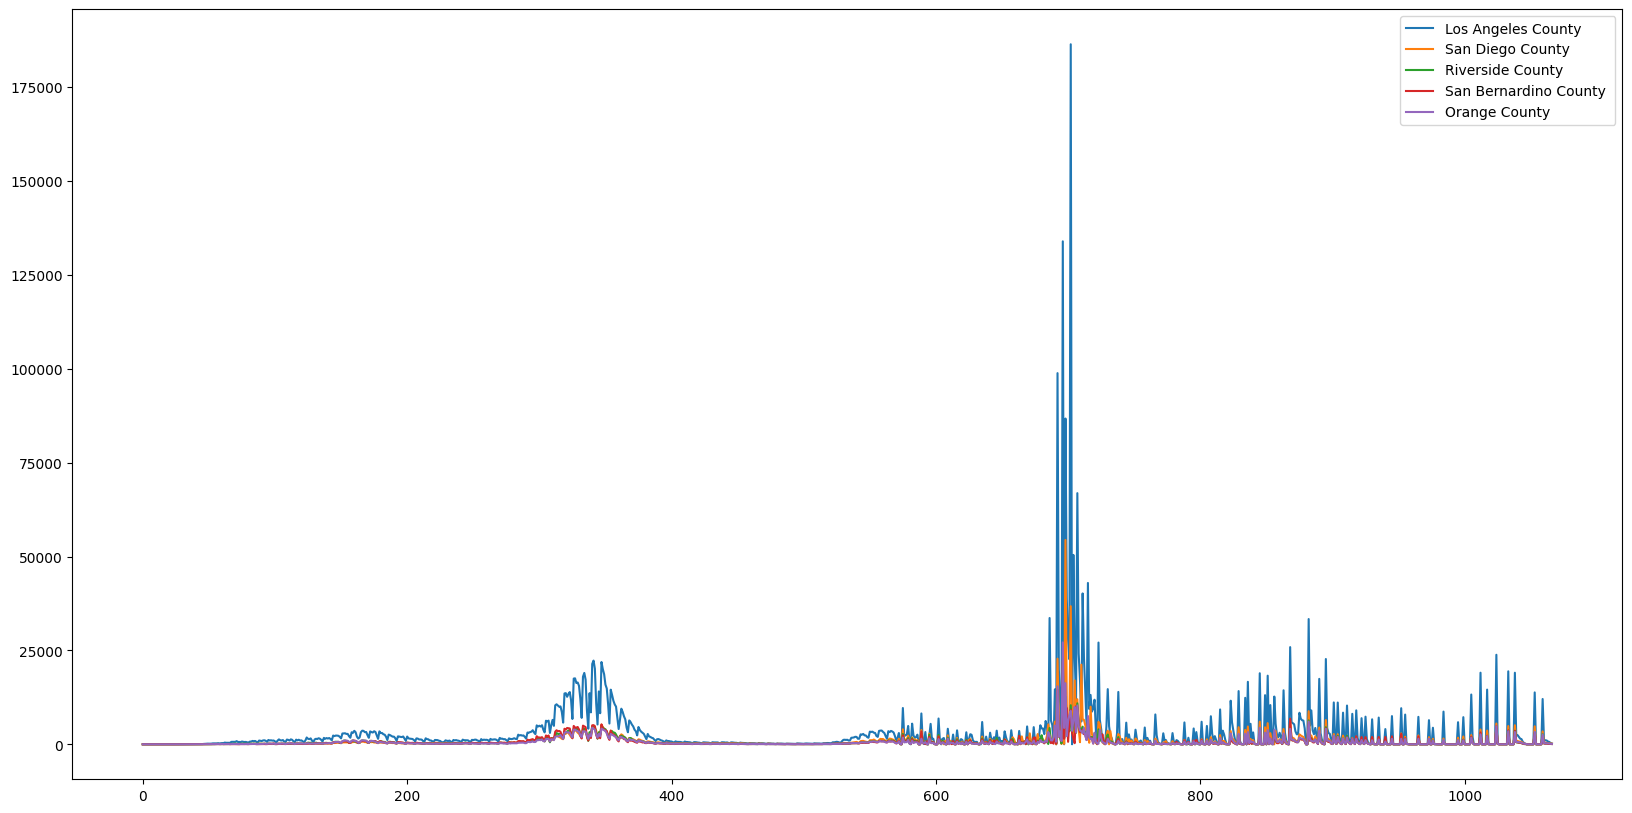

In [601]:
covid_county_most_cases.plot(figsize=(20,10))

<Axes: >

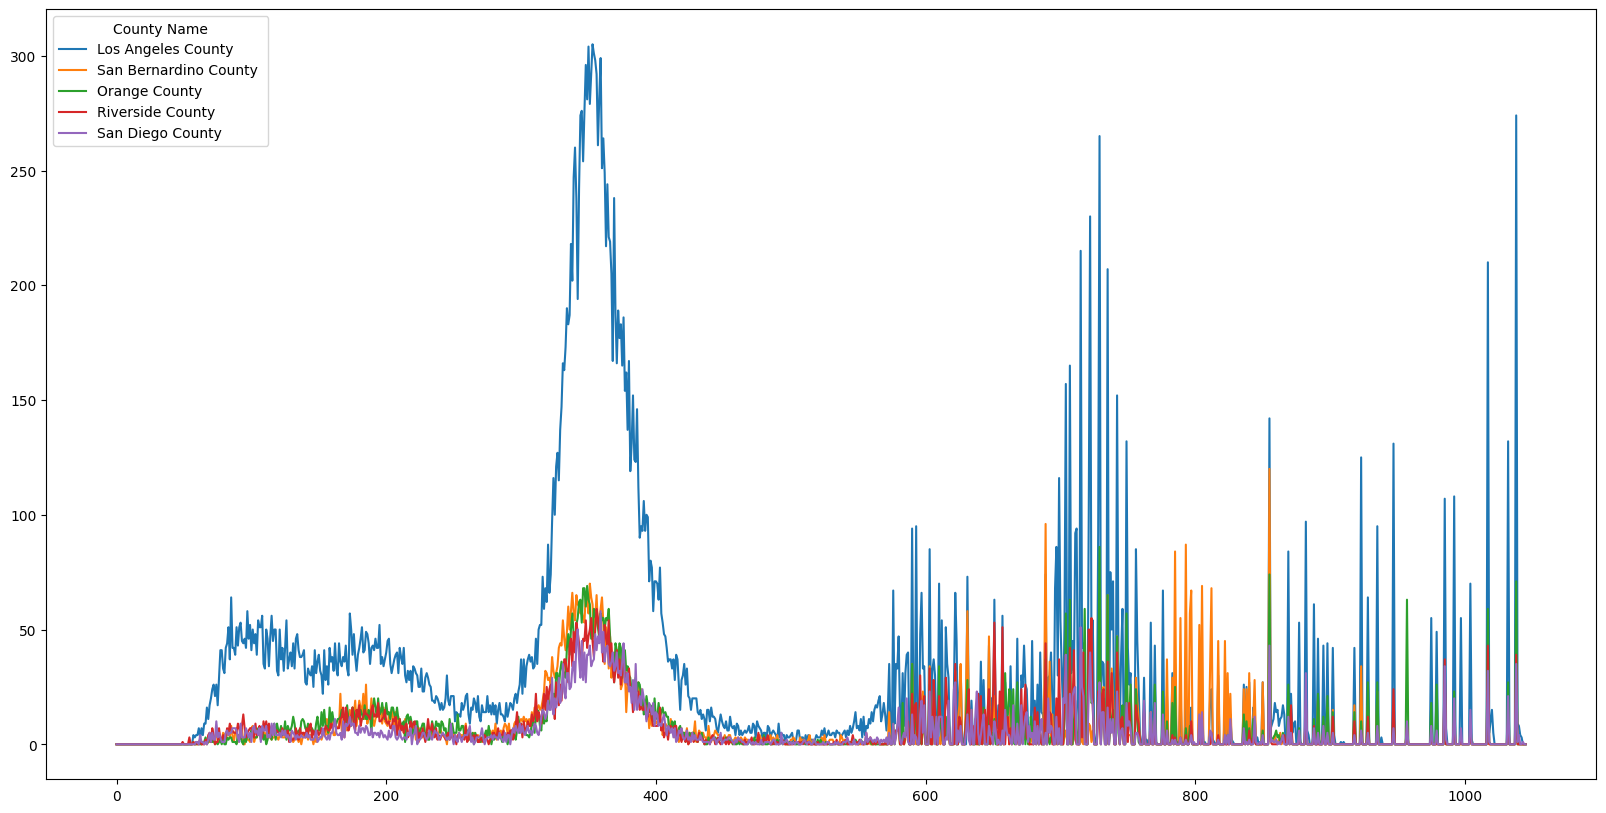

In [602]:
covid_county_most_deaths.plot(figsize=(20,10))

In [603]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

In [604]:
x_cases = np.array(covid_state_most_cases.index).reshape(-1,1).astype(int)
y_cases = covid_state_most_cases.values.astype(int)
x_cases_train, x_cases_test, y_cases_train, y_cases_test = train_test_split(x_cases, y_cases, test_size = 0.15, shuffle=False)
lrl_cases = LinearRegression()
lrl_cases.fit(x_cases_train, y_cases_train)
y_pred_lrl_cases = lrl_cases.predict(x_cases_test)
rmse_lrl_cases = round(sqrt( mean_squared_error(y_cases_test, y_pred_lrl_cases)),2)
print(f'Linear regression Root Mean Square Error (RMSE): {rmse_lrl_cases}')

Linear regression Root Mean Square Error (RMSE): 11527.42


Text(0.5, 1.0, 'Linear Regression for Confirmed Cases in CA')

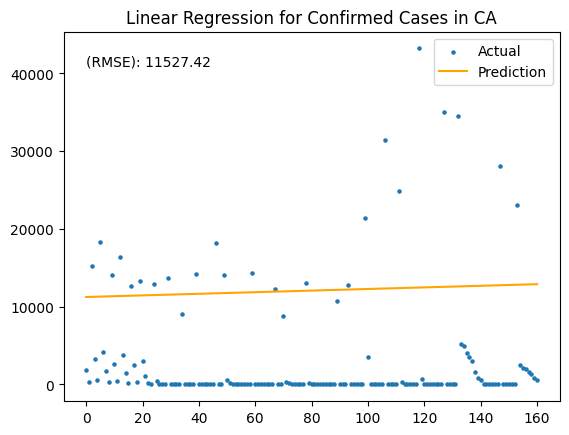

In [605]:
plt.text(x=0,y=41000,s=f'(RMSE): {rmse_lrl_cases}')
plt.scatter(np.arange(len(y_cases_test)),y_cases_test, label='Actual', s=MARKER_SIZE)
plt.plot(y_pred_lrl_cases, color='orange', label='Prediction')
plt.legend()
plt.title(f'Linear Regression for Confirmed Cases in {selected_state_name}')


In [606]:
lrg_cases = LogisticRegression()
lrg_cases.fit(x_cases_train,y_cases_train)
y_pred_cases_lrg = lrg_cases.predict(x_cases_test)
rmse_cases_lrg = round(sqrt( mean_squared_error(y_cases_test, y_pred_cases_lrg)),2)
print(f'Logestic regression Root Mean Square Error (RMSE): {rmse_cases_lrg}')

Logestic regression Root Mean Square Error (RMSE): 8376.57


c:\Users\mosta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


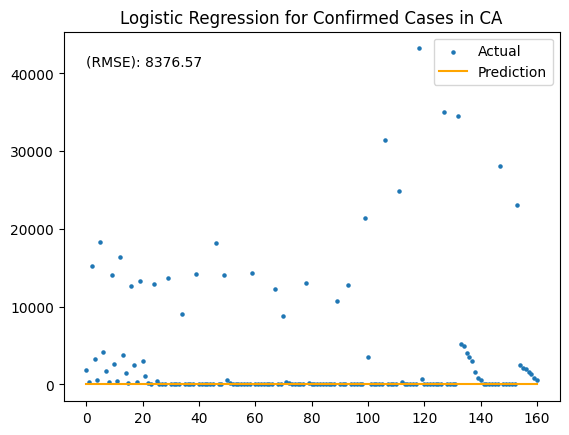

In [607]:
plt.title(f'Logistic Regression for Confirmed Cases in {selected_state_name}')
plt.text(x=0,y=41000,s=f'(RMSE): {rmse_cases_lrg}')
plt.scatter(np.arange(len(y_cases_test)),y_cases_test,label='Actual',s=MARKER_SIZE)
plt.plot(y_pred_cases_lrg, color='orange', label='Prediction', scaley='log')
plt.legend()

In [608]:
model_1 = MyRegressionModel(x_cases_train, y_cases_train, x_cases_test, y_cases_test, fit_type='Polynomial', error_type='RMSE', degree=3)

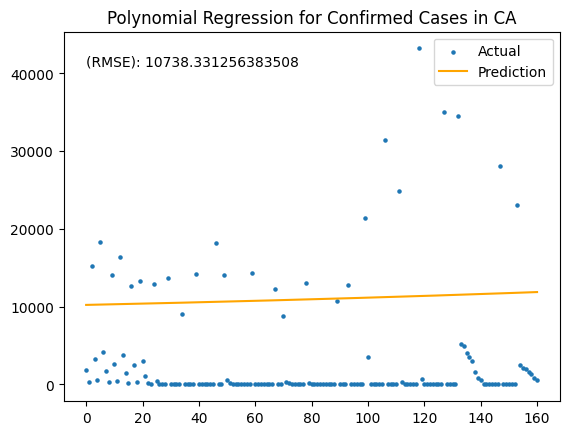

In [609]:
plt.title(f'Polynomial Regression for Confirmed Cases in {selected_state_name}')
plt.text(x=0,y=41000,s=f'(RMSE): {model_1.error}')
plt.scatter(np.arange(len(y_cases_test)),y_cases_test,label='Actual',s=MARKER_SIZE)
plt.plot(model_1.predict(x_cases_test), color='orange', label='Prediction', scaley='log')
plt.legend()

In [610]:
x_deaths = np.array(covid_state_most_deaths.index).reshape(-1,1).astype(int)
y_deaths = covid_state_most_deaths.values.astype(int)
x_deaths_train, x_deaths_test, y_deaths_train, y_deaths_test = train_test_split(x_deaths, y_deaths, test_size = 0.15, shuffle=False)
lrl_deaths = LinearRegression()
lrl_deaths.fit(x_deaths_train, y_deaths_train)
y_pred_lrl_deaths = lrl_deaths.predict(x_deaths_test)
rmse_lrl_deaths = sqrt( mean_squared_error(y_deaths_test, y_pred_lrl_deaths))
print(f'Linear regression Root Mean Square Error (RMSE): {round(rmse_lrl_deaths,2)}')

Linear regression Root Mean Square Error (RMSE): 67.12


Text(0, 350, '(RMSE): 67.11944665628599')

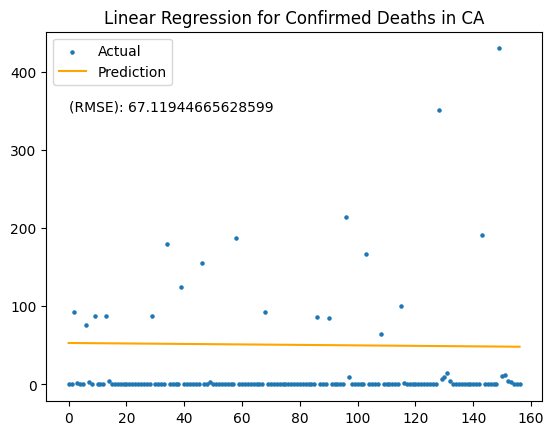

In [611]:
plt.scatter(np.arange(len(y_deaths_test)),y_deaths_test, label='Actual',s=MARKER_SIZE)
plt.plot(y_pred_lrl_deaths, color='orange', label='Prediction')
plt.legend()
plt.title('Linear Regression for Confirmed Deaths in ' + selected_state_name)
plt.text(x=0, y=350, s=f'(RMSE): {rmse_lrl_deaths}')

In [612]:
lrg_deaths = LogisticRegression()
lrg_deaths.fit(x_deaths_train,y_deaths_train)
y_pred_deaths_lrg = lrg_deaths.predict(x_deaths_test)
rmse_deaths_lrg = round(sqrt( mean_squared_error(y_deaths_test, y_pred_deaths_lrg)),2)
print(f'Logestic regression Root Mean Square Error (RMSE): {rmse_deaths_lrg}')

Logestic regression Root Mean Square Error (RMSE): 61.89


c:\Users\mosta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


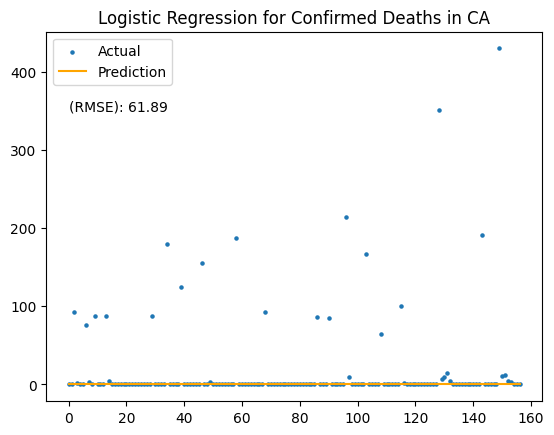

In [613]:
plt.title(f'Logistic Regression for Confirmed Deaths in {selected_state_name}')
plt.text(x=0,y=350,s=f'(RMSE): {rmse_deaths_lrg}')
plt.scatter(np.arange(len(y_deaths_test)),y_deaths_test,label='Actual',s=MARKER_SIZE)
plt.plot(y_pred_deaths_lrg, color='orange', label='Prediction', scaley='log')
plt.legend()

In [614]:
model_2 = MyRegressionModel(x_deaths_train, y_deaths_train, x_deaths_test, y_deaths_test, fit_type='Polynomial', error_type='RMSE', degree=3)

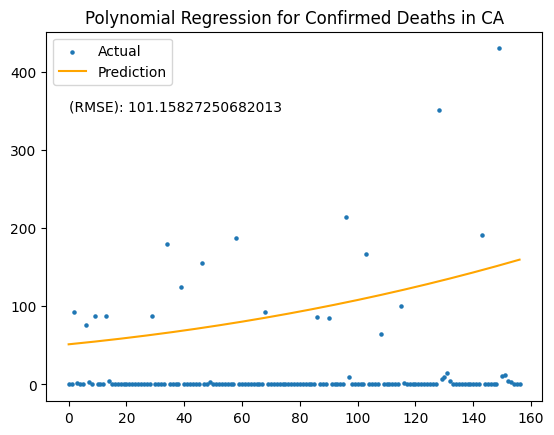

In [615]:
plt.scatter(np.arange(len(y_deaths_test)),y_deaths_test, s=MARKER_SIZE)
plt.plot(model_2.predict(x_deaths_test), color='orange')
plt.text(x=0,y=350,s=f'(RMSE): {model_2.error}')
plt.title(f'Polynomial Regression for Confirmed Deaths in {selected_state_name}')
plt.legend(['Actual', 'Prediction'])

In [616]:
x_county_1_cases = np.array(covid_county_1_most_cases.index).reshape(-1,1).astype(int)
x_county_2_cases = np.array(covid_county_2_most_cases.index).reshape(-1,1).astype(int)
x_county_3_cases = np.array(covid_county_3_most_cases.index).reshape(-1,1).astype(int)
x_county_4_cases = np.array(covid_county_4_most_cases.index).reshape(-1,1).astype(int)
x_county_5_cases = np.array(covid_county_5_most_cases.index).reshape(-1,1).astype(int)
y_county_1_cases = covid_county_1_most_cases.values.astype(int)
y_county_2_cases = covid_county_2_most_cases.values.astype(int)
y_county_3_cases = covid_county_3_most_cases.values.astype(int)
y_county_4_cases = covid_county_4_most_cases.values.astype(int)
y_county_5_cases = covid_county_5_most_cases.values.astype(int)

In [617]:
x_county_1_cases_train, x_county_1_cases_test, y_county_1_cases_train, y_county_1_cases_test = train_test_split(x_county_1_cases, y_county_1_cases, test_size = 0.15, shuffle=False)
x_county_2_cases_train, x_county_2_cases_test, y_county_2_cases_train, y_county_2_cases_test = train_test_split(x_county_2_cases, y_county_2_cases, test_size = 0.15, shuffle=False)
x_county_3_cases_train, x_county_3_cases_test, y_county_3_cases_train, y_county_3_cases_test = train_test_split(x_county_3_cases, y_county_3_cases, test_size = 0.15, shuffle=False)
x_county_4_cases_train, x_county_4_cases_test, y_county_4_cases_train, y_county_4_cases_test = train_test_split(x_county_4_cases, y_county_4_cases, test_size = 0.15, shuffle=False)
x_county_5_cases_train, x_county_5_cases_test, y_county_5_cases_train, y_county_5_cases_test = train_test_split(x_county_5_cases, y_county_5_cases, test_size = 0.15, shuffle=False)

In [618]:
lrl_county_1_cases = LinearRegression()
lrl_county_2_cases = LinearRegression()
lrl_county_3_cases = LinearRegression()
lrl_county_4_cases = LinearRegression()
lrl_county_5_cases = LinearRegression()

In [619]:
lrl_county_1_cases.fit(x_county_1_cases_train, y_county_1_cases_train)
lrl_county_2_cases.fit(x_county_2_cases_train, y_county_2_cases_train)
lrl_county_3_cases.fit(x_county_3_cases_train, y_county_3_cases_train)
lrl_county_4_cases.fit(x_county_4_cases_train, y_county_4_cases_train)
lrl_county_5_cases.fit(x_county_5_cases_train, y_county_5_cases_train)

LinearRegression()

In [620]:
y_pred_lrl_county_1_cases = lrl_county_1_cases.predict(x_county_1_cases_test)
y_pred_lrl_county_2_cases = lrl_county_2_cases.predict(x_county_2_cases_test)
y_pred_lrl_county_3_cases = lrl_county_3_cases.predict(x_county_3_cases_test)
y_pred_lrl_county_4_cases = lrl_county_4_cases.predict(x_county_4_cases_test)
y_pred_lrl_county_5_cases = lrl_county_5_cases.predict(x_county_5_cases_test)

In [621]:
rmse_lrl_county_1_cases = round(sqrt( mean_squared_error(y_county_1_cases_test, y_pred_lrl_county_1_cases)),2)
rmse_lrl_county_2_cases = round(sqrt( mean_squared_error(y_county_2_cases_test, y_pred_lrl_county_2_cases)),2)
rmse_lrl_county_3_cases = round(sqrt( mean_squared_error(y_county_3_cases_test, y_pred_lrl_county_3_cases)),2)
rmse_lrl_county_4_cases = round(sqrt( mean_squared_error(y_county_4_cases_test, y_pred_lrl_county_4_cases)),2)
rmse_lrl_county_5_cases = round(sqrt( mean_squared_error(y_county_5_cases_test, y_pred_lrl_county_5_cases)),2)

In [622]:
print(f'Linear regression Root Mean Square Error (RMSE): {selected_counties_most_cases_names[0]} \t\t {rmse_lrl_county_1_cases}')
print(f'Linear regression Root Mean Square Error (RMSE): {selected_counties_most_cases_names[1]} \t\t {rmse_lrl_county_2_cases}')
print(f'Linear regression Root Mean Square Error (RMSE): {selected_counties_most_cases_names[2]} \t\t {rmse_lrl_county_3_cases}')
print(f'Linear regression Root Mean Square Error (RMSE): {selected_counties_most_cases_names[3]} \t {rmse_lrl_county_4_cases}')
print(f'Linear regression Root Mean Square Error (RMSE): {selected_counties_most_cases_names[4]} \t\t {rmse_lrl_county_5_cases}')

Linear regression Root Mean Square Error (RMSE): Los Angeles County  		 6357.82
Linear regression Root Mean Square Error (RMSE): San Diego County  		 1852.23
Linear regression Root Mean Square Error (RMSE): Riverside County  		 1122.13
Linear regression Root Mean Square Error (RMSE): San Bernardino County  	 1101.61
Linear regression Root Mean Square Error (RMSE): Orange County  		 1156.27


In [623]:
model_3 = MyRegressionModel(x_county_1_cases_train, y_county_1_cases_train, x_county_1_cases_test, y_county_1_cases_test, fit_type='Polynomial')
model_4 = MyRegressionModel(x_county_2_cases_train, y_county_2_cases_train, x_county_2_cases_test, y_county_2_cases_test, fit_type='Polynomial')
model_5 = MyRegressionModel(x_county_3_cases_train, y_county_3_cases_train, x_county_3_cases_test, y_county_3_cases_test, fit_type='Polynomial')
model_6 = MyRegressionModel(x_county_4_cases_train, y_county_4_cases_train, x_county_4_cases_test, y_county_4_cases_test, fit_type='Polynomial')
model_7 = MyRegressionModel(x_county_5_cases_train, y_county_5_cases_train, x_county_5_cases_test, y_county_5_cases_test, fit_type='Polynomial')

RMSE: 5745.198930058755


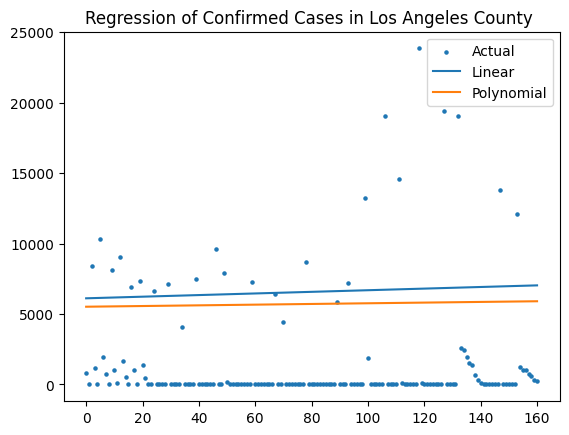

In [624]:
plt.scatter(np.arange(len(y_county_1_cases_test)),y_county_1_cases_test, label=f'Actual', s=MARKER_SIZE)
plt.plot(y_pred_lrl_county_1_cases, label=f'Linear')
plt.plot(model_3.predict(x_county_1_cases_test), label=f'Polynomial')
plt.legend()
plt.title(f'Regression of Confirmed Cases in {selected_counties_most_cases_names[0]}')
print(f'RMSE: {model_3.error}')

RMSE: 1369.587334416514


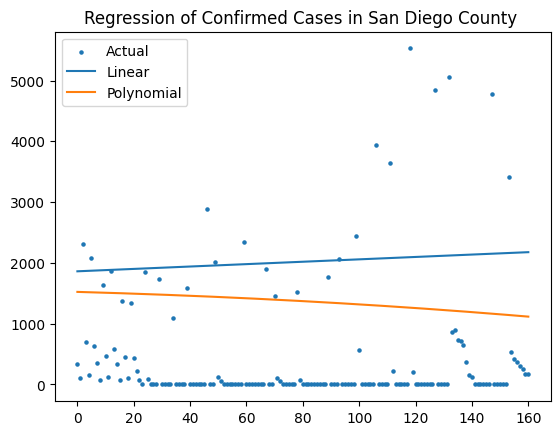

In [625]:
plt.scatter(np.arange(len(y_county_2_cases_test)),y_county_2_cases_test, label=f'Actual', s=MARKER_SIZE)
plt.plot(y_pred_lrl_county_2_cases, label=f'Linear')
plt.plot(model_4.predict(x_county_2_cases_test), label=f'Polynomial')
plt.legend()
plt.title(f'Regression of Confirmed Cases in {selected_counties_most_cases_names[1]}')
print(f'RMSE: {model_4.error}')

RMSE: 1125.4924045873065


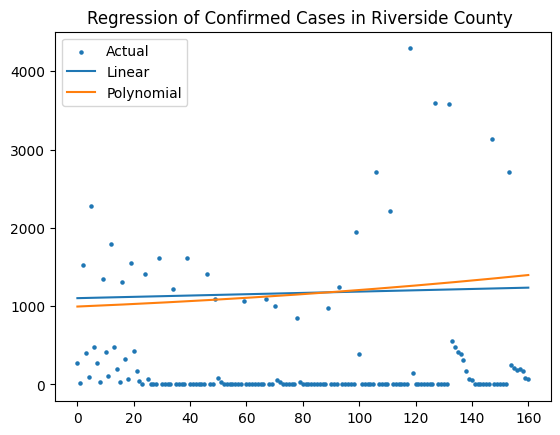

In [626]:
plt.scatter(np.arange(len(y_county_3_cases_test)),y_county_3_cases_test, label=f'Actual', s=MARKER_SIZE)
plt.plot(y_pred_lrl_county_3_cases, label=f'Linear')
plt.plot(model_5.predict(x_county_3_cases_test), label=f'Polynomial')
plt.legend()
plt.title(f'Regression of Confirmed Cases in {selected_counties_most_cases_names[2]}')
print(f'RMSE: {model_5.error}')

RMSE: 1303.8920457810668


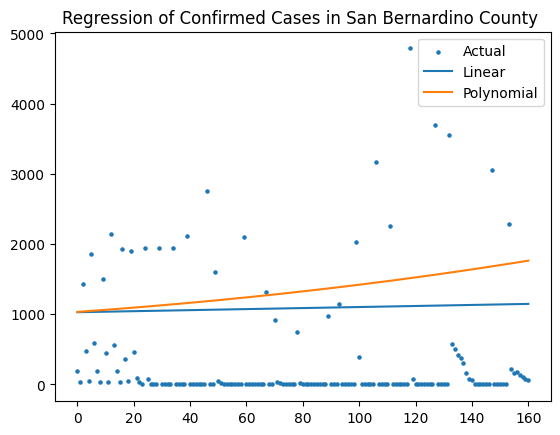

In [627]:
plt.scatter(np.arange(len(y_county_4_cases_test)),y_county_4_cases_test, label=f'Actual', s=MARKER_SIZE)
plt.plot(y_pred_lrl_county_4_cases, label=f'Linear')
plt.plot(model_6.predict(x_county_4_cases_test), label=f'Polynomial')
plt.legend()
plt.title(f'Regression of Confirmed Cases in {selected_counties_most_cases_names[3]}')
print(f'RMSE: {model_6.error}')

RMSE: 1303.7670457212203


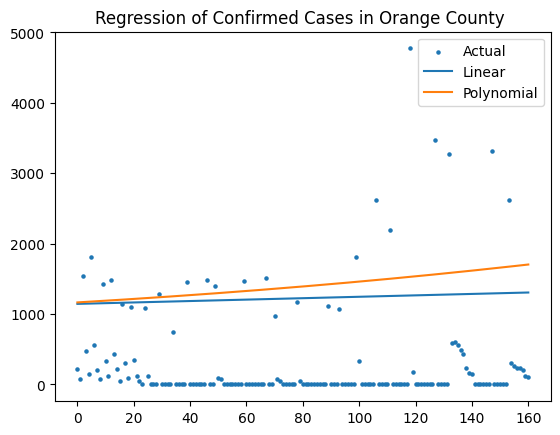

In [628]:
plt.scatter(np.arange(len(y_county_5_cases_test)),y_county_5_cases_test, label=f'Actual', s=MARKER_SIZE)
plt.plot(y_pred_lrl_county_5_cases, label=f'Linear')
plt.plot(model_7.predict(x_county_5_cases_test), label=f'Polynomial')
plt.legend()
plt.title(f'Regression of Confirmed Cases in {selected_counties_most_cases_names[4]}')
print(f'RMSE: {model_7.error}')

In [ ]:
enrichment_df = pd.read_csv('data/enrichment.csv')
enrichment_df[enrichment_df.columns[3:]] = enrichment_df[enrichment_df.columns[3:]].apply(lambda x: x.str.strip('%').astype('float'))
enrichment_df = enrichment_df[enrichment_df['Sex'] == 'T']
enrichment_df = enrichment_df.drop(['Sex', 'StateFIPS'], axis=1)
enrichment_df = enrichment_df.set_index(enrichment_df['State']).drop('State', axis=1)
enrichment_df = enrichment_df.sort_index()
enrichment_youth_df = enrichment_df[enrichment_df.columns[:8]]
enrichment_senior_df = enrichment_df[enrichment_df.columns[8:]]
enrichment_youth_df = enrichment_youth_df.aggregate(np.sum, axis=1)
enrichment_senior_df = enrichment_senior_df.aggregate(np.sum, axis=1)
enrichment_df.head(3)